# CNN for dogs and cats classfication using transfer learning (RESNET50)

## We import the libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50 #We import the Resnet50 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#We check the tf version
tf.__version__

'2.12.0'

#### I define the route of the images since I am leaving the code in the root folder thats why I dont use absolutes routes

In [2]:
train_dir = 'training_set'
test_dir = 'test_set'

### Preprocessing the data

In [3]:
#We define the image size of resize and the batch size 
image_size = (224, 224)
batch_size = 32
#We create de image datagenerator specifing the preprocessing_function of the resnet50
train_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet50.preprocess_input, validation_split=0.2)  # 20% del conjunto de entrenamiento será utilizado como validación)
test_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet50.preprocess_input)

### Creation of data generators

In [4]:
#We create de generators using thr datagens where the class_mode is binary since the results can only be of two types
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)
#Validation is the 20% of the train datagen
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

Found 6400 images belonging to 2 classes.
Found 1600 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


### CREATE THE MODEL

In [11]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
#We define the resnet model removing the top full connected layers because we have more flexibility in the architecture and we can create our custom model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# We create the model
x = base_model.output #We take the output of the last predefine resnet layer
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

# Crear el modelo final tomando en cuenta la base del modelo y el output previamente definido
model = Model(inputs=base_model.input, outputs=predictions)

#We freeze the weights of the network
for layers in base_model.layers:
    layers.trainable = False

# Compilar el modelo con la funcion adam
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



# Imprimir un resumen de la arquitectura del modelo
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_6[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

### Train the model

In [13]:
history_callback = model.fit(train_generator,steps_per_epoch=len(train_generator),epochs=2,validation_data=validation_generator,validation_steps=len(validation_generator))

Epoch 1/2
200/200 [==============================] - 2034s 10s/step - loss: 0.0601 - accuracy: 0.9802 - val_loss: 0.0337 - val_accuracy: 0.9869
Epoch 2/2
200/200 [==============================] - 1915s 10s/step - loss: 0.0227 - accuracy: 0.9916 - val_loss: 0.0408 - val_accuracy: 0.9831


### Metrics

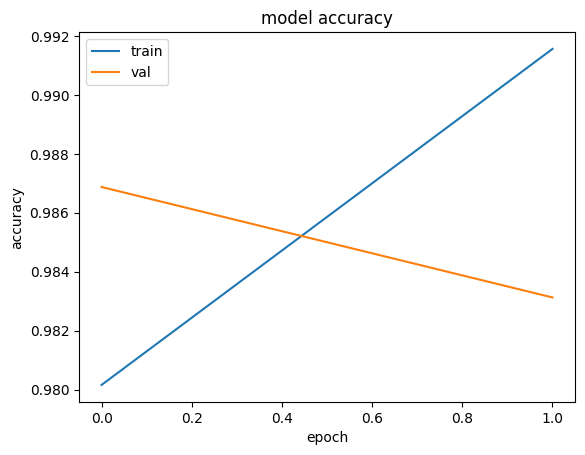

In [14]:
from matplotlib import pyplot as plt

plt.plot(history_callback.history['accuracy'])
plt.plot(history_callback.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

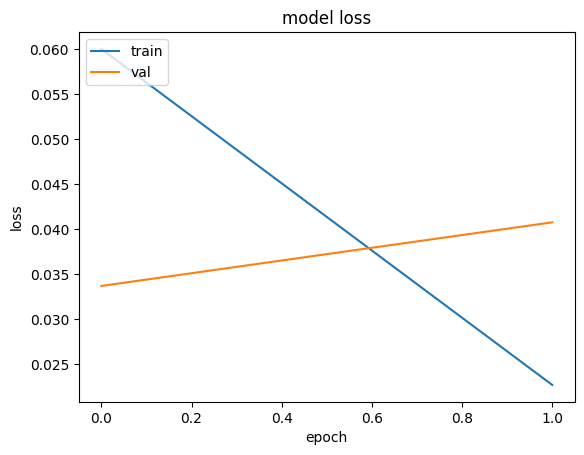

In [15]:
plt.plot(history_callback.history['loss'])
plt.plot(history_callback.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### Predicction

In [16]:
predictions = model.predict(test_generator)
predicted_labels = [1 if prediction > 0.5 else 0 for prediction in predictions]
print(predicted_labels)

63/63 [==============================] - 484s 8s/step
[0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 

### Evaluation

In [17]:
test_loss, test_acc = model.evaluate(test_generator)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

63/63 [==============================] - 519s 8s/step - loss: 0.0482 - accuracy: 0.9855
Test Loss: 0.04823160916566849
Test Accuracy: 0.9854999780654907
